In [164]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

%matplotlib inline

# Load Data

In [165]:
df = pd.read_csv('../data/CarPrice.csv')


# Validate Data

In [166]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [167]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# Check Structure of Data
- verify columns format
- check for non-null values
- memory usage

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [169]:
df.select_dtypes('int64')

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,3,2548,130,111,5000,21,27
1,2,3,2548,130,111,5000,21,27
2,3,1,2823,152,154,5000,19,26
3,4,2,2337,109,102,5500,24,30
4,5,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28
201,202,-1,3049,141,160,5300,19,25
202,203,-1,3012,173,134,5500,18,23
203,204,-1,3217,145,106,4800,26,27


In [170]:
df.symboling.value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [171]:
df.select_dtypes('float64')

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


In [172]:
#####
# Total 16 Quantitative variables, out of which 8 are continuous, 
# 7 are integer, 1(symboling) int-categories
# Target columns is price

In [173]:
# set inde as car id
df.set_index('car_ID', inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [174]:
numerical = df.select_dtypes(['int64', 'float64']).drop(columns=['symboling'])
numerical.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [175]:
columns_to_remove = list(df.select_dtypes('int64').columns)
columns_to_remove.remove('symboling')
columns_to_remove

['curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [176]:
categorical = df.select_dtypes(['object', 'int64']).drop(columns=columns_to_remove)
categorical

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi


In [177]:
#####
# seperated categorical variable and numerical variable

# Check Descriptive Stats
- mean
- Standard Deviation
- min, max
- Quartiles 25%, 50%, 75%

In [178]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


In [179]:
#####
# Average car price is 13K
# Variation in price is 7988

# Visual Analysis
    

## Univariate analysis
    - Histogram
    - Bar Plot
    - Boxplot
    - Violin Plot
    - Pie Chart

### Numerical Analysis

<Axes: xlabel='wheelbase', ylabel='Count'>

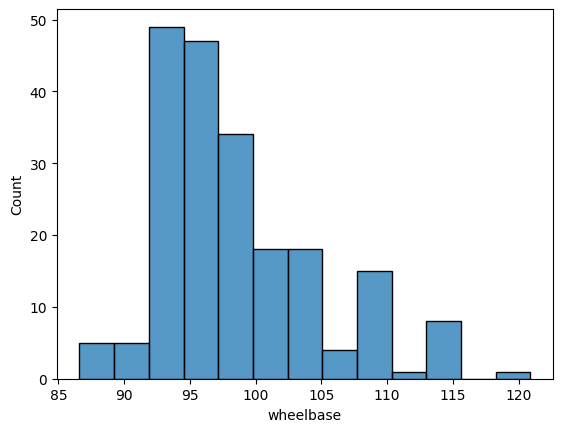

In [180]:
sns.histplot(data= numerical, x = "wheelbase")

In [181]:
##### wheelbase is left Skewed, following a long tail at the right, some discretization is also there
##### Most of the car wheelbase ranges between 90 - 110

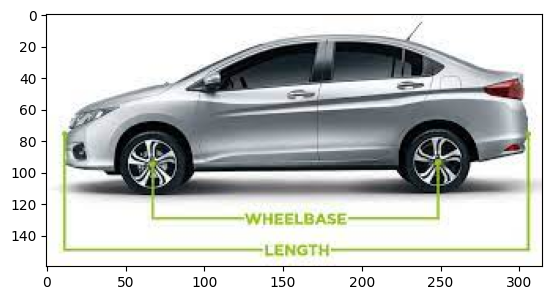

In [182]:
carImg = cv2.imread("./images/car.jpg")
img = cv2.cvtColor(carImg, cv2.COLOR_BGR2RGB)
plt.imshow(img)

*** The wheelbase of a car refers to the horizontal distance between the centers of the front and rear axles. In other words, it is the measurement from the center of the front wheel to the center of the rear wheel. The wheelbase is an important dimension in vehicle design and has a significant impact on a car's handling, stability, and ride comfort.

* Here are a few key points about wheelbase in cars:

* 1. Stability: A longer wheelbase generally contributes to greater stability, especially at higher speeds. This is because a longer distance between the axles can help distribute the vehicle's weight more evenly and reduce the likelihood of tipping or rolling over.

* 2. Ride Comfort: Wheelbase can also affect the comfort of the ride for occupants. A longer wheelbase often results in a smoother ride, as it allows the vehicle to better absorb bumps and imperfections in the road.

* 3. Handling: Shorter wheelbases can make a car feel more nimble and responsive, which can be desirable for sportier or more agile driving characteristics. Longer wheelbases may make a car feel less agile but more stable, which is often preferred for larger vehicles like sedans and SUVs.

* 4. Interior Space: The length of the wheelbase can influence the amount of interior space available in a car. A longer wheelbase typically provides more legroom for rear-seat passengers.

* 5. Turning Radius: A shorter wheelbase generally allows a vehicle to have a tighter turning radius, making it easier to maneuver in tight spaces.

* 6. Vehicle Type: Different types of vehicles, such as sports cars, compact cars, sedans, SUVs, and trucks, have varying wheelbase lengths based on their intended purposes and design goals.

* In summary, the wheelbase of a car is a critical dimension that impacts its stability, ride comfort, handling characteristics, interior space, and maneuverability. Automakers carefully consider the wheelbase when designing and engineering their vehicles to meet the desired performance and comfort attributes for a specific model.

<Axes: xlabel='wheelbase'>

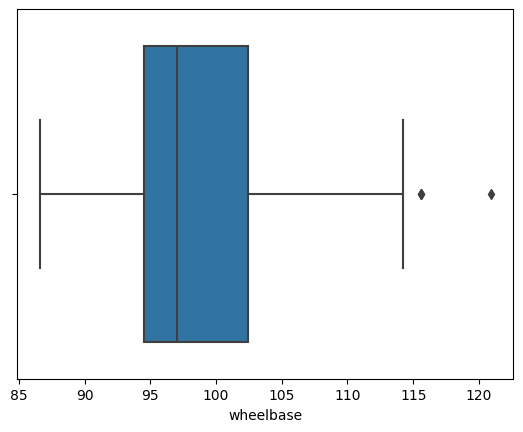

In [183]:
sns.boxplot(data= numerical, x = "wheelbase")

In [184]:
### We have outliers in wheelbase, need to treat outliers

<Axes: xlabel='carlength', ylabel='Count'>

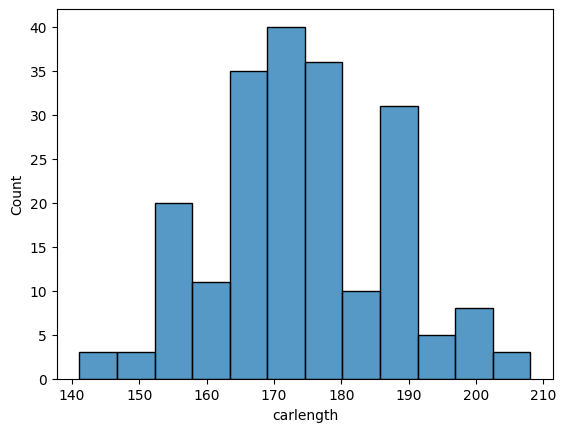

In [185]:
# sns.set_style("whitegrid")
sns.histplot(data = numerical, x = "carlength")

In [186]:
##### carlength is left Skewed, following a long tail at the right
##### Most of the car length ranges between 150 - 190

<Axes: xlabel='carlength'>

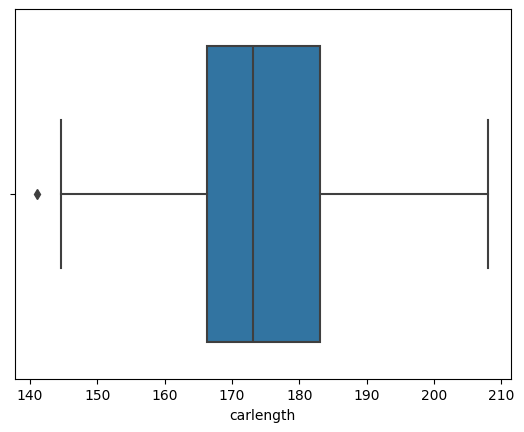

In [187]:
sns.boxplot(data = numerical, x = "carlength")

In [188]:
### We have outliers in carlength, need to treat outliers

<Axes: xlabel='carwidth', ylabel='Count'>

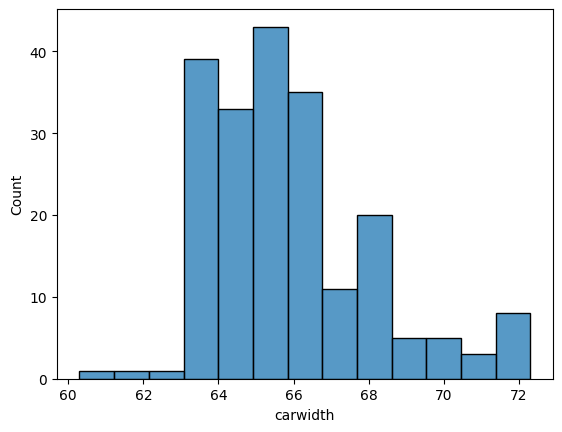

In [189]:
sns.histplot(data = numerical, x="carwidth")

In [190]:
##### carwidth is left Skewed, following a long tail at the right
##### Most of the car width ranges between 63 - 68

<Axes: xlabel='carwidth'>

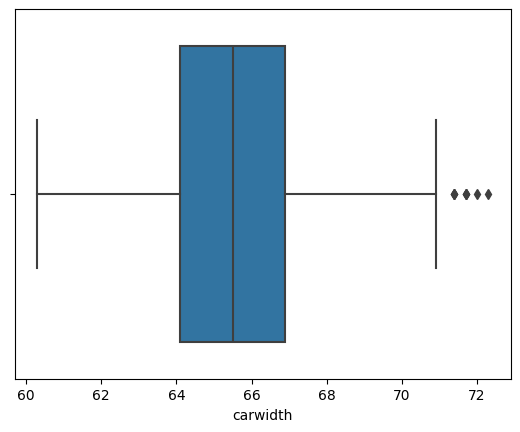

In [191]:
sns.boxplot( data = numerical, x = "carwidth")

In [192]:
### We have outliers in carwidth, need to treat outliers

<Axes: xlabel='carheight', ylabel='Count'>

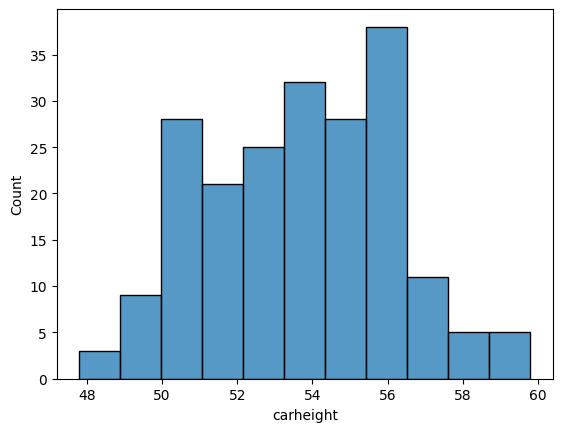

In [193]:
sns.histplot( data = numerical, x = "carheight")

In [194]:
##### carheight is left Skewed, following a long tail at the right
##### Most of the car height ranges between 50 - 58

<Axes: xlabel='carheight'>

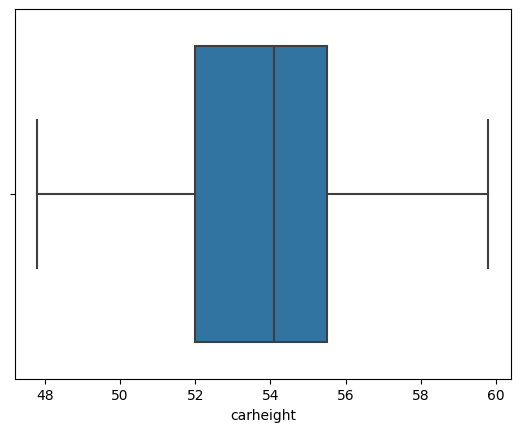

In [195]:
sns.boxplot( data = numerical, x = "carheight")

In [196]:
### There is no outliers in carheight

<Axes: xlabel='curbweight', ylabel='Count'>

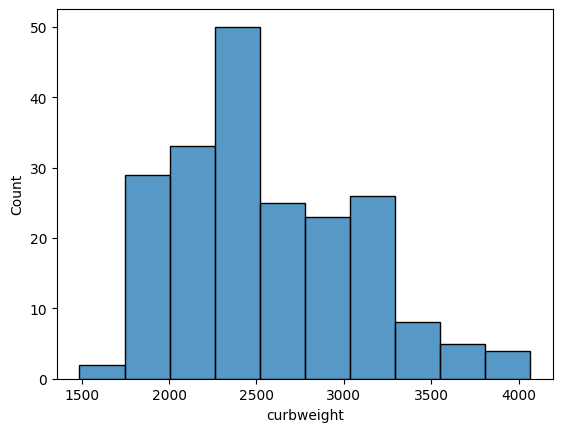

In [197]:
sns.histplot( data = numerical, x = "curbweight")

In [198]:
##### curbweight is left Skewed, following a long tail at the right
##### Most of the car curbweight ranges between 1700 - 3500

<Axes: xlabel='curbweight'>

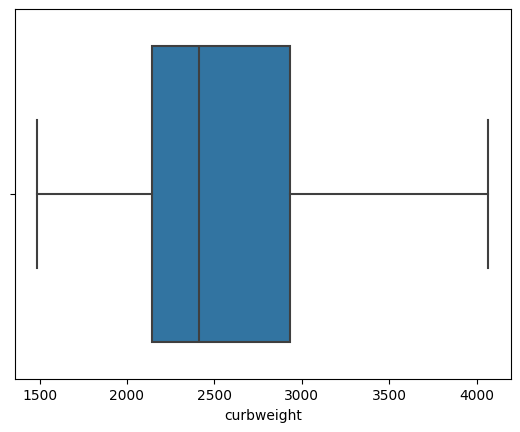

In [199]:
sns.boxplot( data = numerical, x = "curbweight")

In [200]:
### There is no outliers in curbweight

<Axes: xlabel='enginesize', ylabel='Count'>

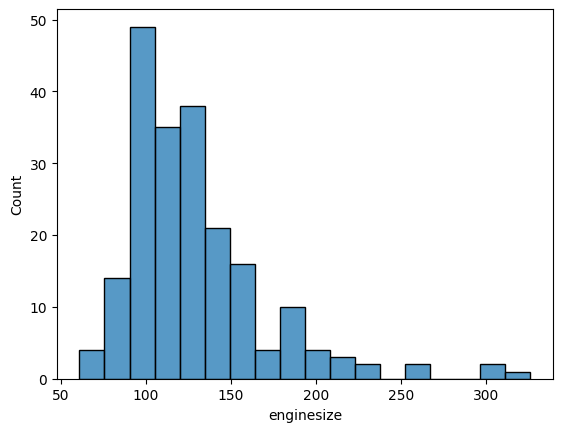

In [201]:
sns.histplot( data = numerical, x = "enginesize")

In [202]:
##### enginesize is left Skewed, following a long tail at the right, some discretization is also there
##### Most of the engine size ranges between 50 - 200

<Axes: xlabel='enginesize'>

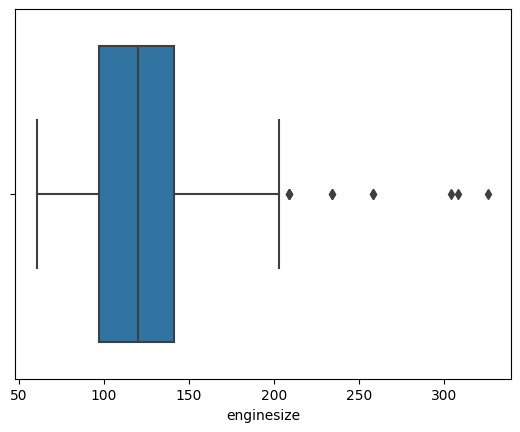

In [203]:
sns.boxplot( data = numerical, x = "enginesize")

In [204]:
#### we have outliers in enginesize, need to treat outliers

<Axes: xlabel='boreratio', ylabel='Count'>

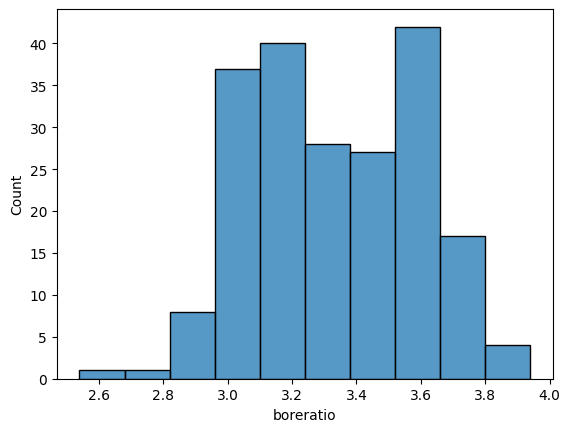

In [205]:
sns.histplot( data = numerical, x = "boreratio")

In [206]:
##### boreratio is left Skewed, following a long tail at the right
##### Most of the car boreratio ranges between 3.0 - 3.8

<Axes: xlabel='boreratio'>

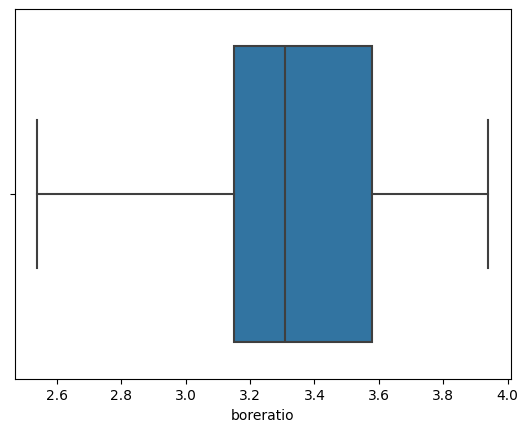

In [207]:
sns.boxplot( data = numerical, x = "boreratio")

In [208]:
#### there is no outliers in  car boreratio

<Axes: xlabel='stroke', ylabel='Count'>

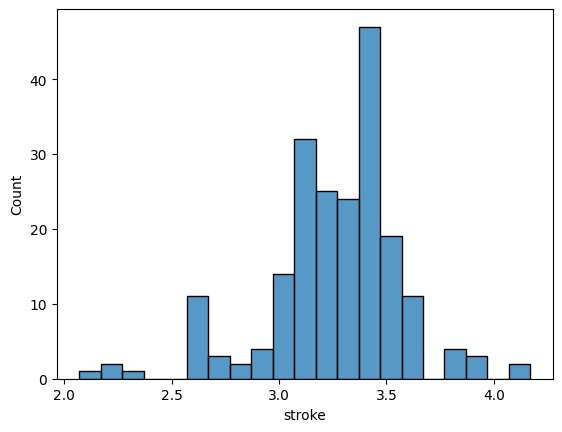

In [209]:
sns.histplot( data = numerical, x = "stroke")

In [210]:
##### stroke is left Skewed, following a long tail at the right, some discretization is also there
##### Most of the car stroke ranges between 2.5 - 36

<Axes: xlabel='stroke'>

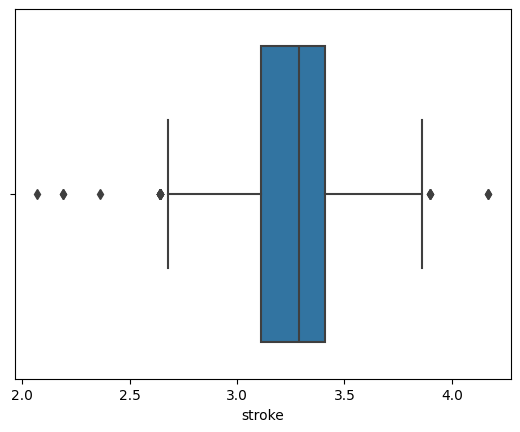

In [211]:
sns.boxplot( data = numerical, x = "stroke")

In [212]:
#### we have outliers in stroke, need to treat outliers

<Axes: xlabel='compressionratio', ylabel='Count'>

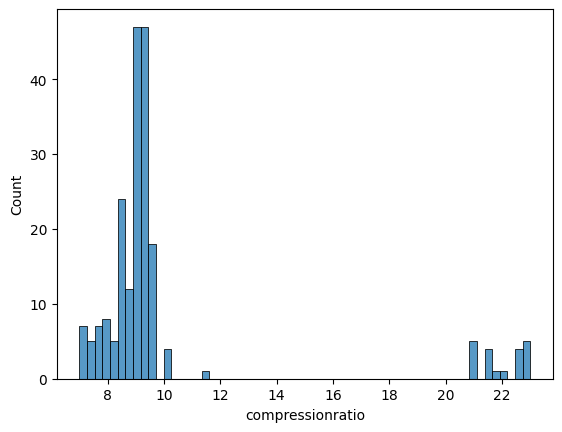

In [213]:
sns.histplot( data = numerical, x = "compressionratio")

In [214]:
##### compressionratio is left Skewed, following a long tail at the right, some discretization is also there
##### Most of the car compressionratio ranges between 7.5 - 10.0

<Axes: xlabel='horsepower', ylabel='Count'>

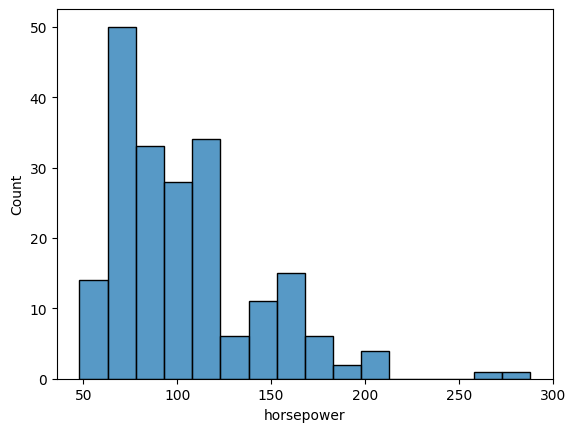

In [215]:
sns.histplot(data=numerical, x='horsepower')

In [216]:
##### Horsepower is Left Skewed, following long tail at the right, some discretization is also there
##### Most of the car hosrsepower ranges between 50 - 125

<Axes: xlabel='horsepower'>

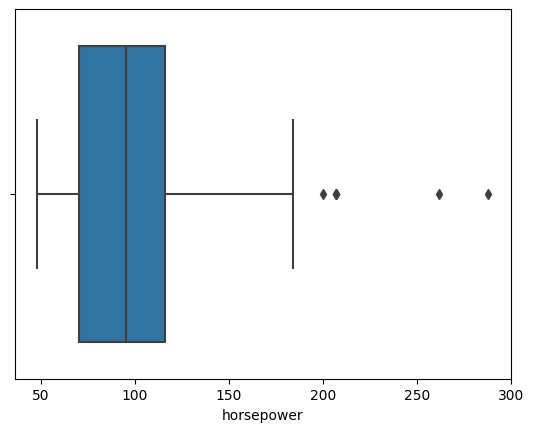

In [217]:
sns.boxplot( data = numerical, x = "horsepower")

In [218]:
#### we have outliers in horsepower, need to treat outliers

<Axes: xlabel='peakrpm', ylabel='Count'>

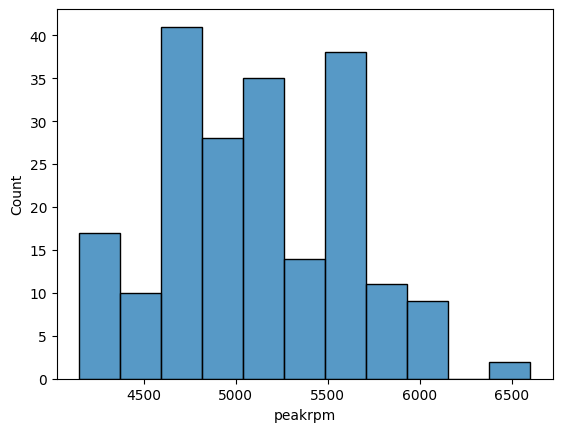

In [219]:
sns.histplot( data = numerical, x = "peakrpm")

In [220]:
##### peakrpm is left Skewed, following a long tail at the right, some discretization is also there
##### Most of the car wheelbase ranges between 4000 - 6000

<Axes: xlabel='peakrpm'>

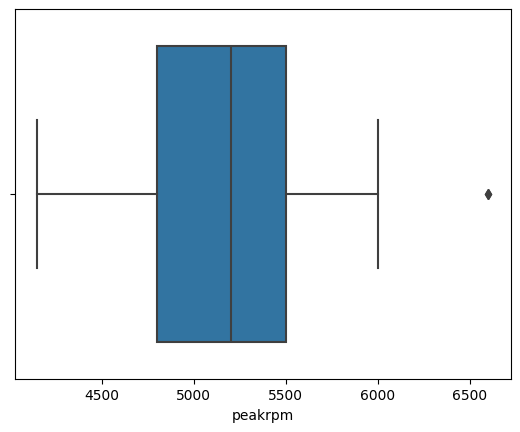

In [221]:
sns.boxplot( data = numerical, x = "peakrpm")

In [222]:
#### we have outliers in peakrpm, need to treat outliers

<Axes: xlabel='citympg', ylabel='Count'>

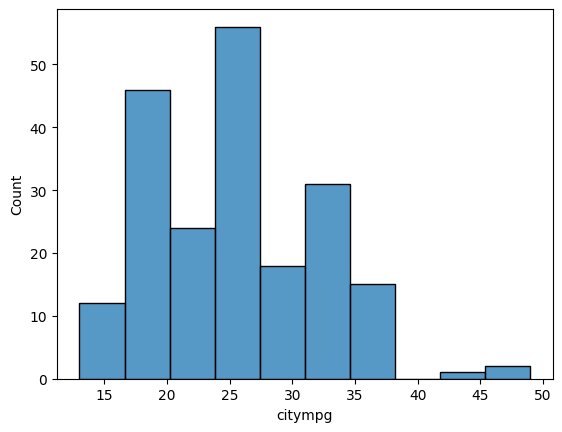

In [223]:
sns.histplot( data = numerical, x = "citympg")

In [224]:
##### citympg is left Skewed, following a long tail at the right, some discretization is also there
##### Most of the car citympg ranges between 15 - 35

<Axes: xlabel='citympg'>

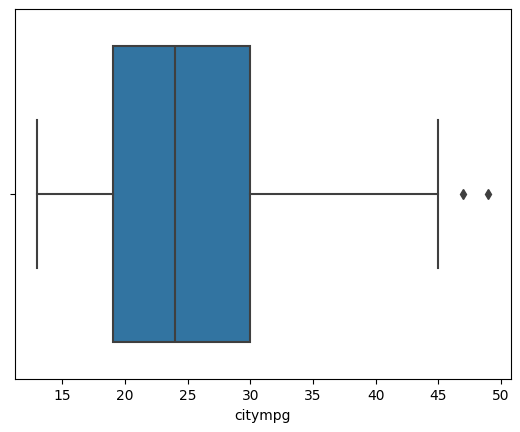

In [225]:
sns.boxplot( data = numerical, x = "citympg")

In [226]:
#### we have outliers in citympg, need to treat outliers

<Axes: xlabel='highwaympg', ylabel='Count'>

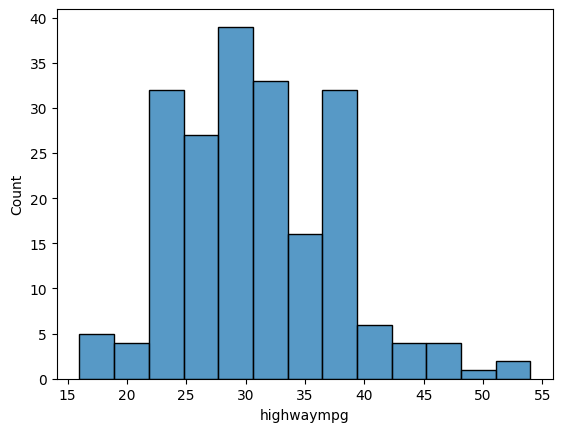

In [227]:
sns.histplot( data = numerical, x = "highwaympg")

In [228]:
##### highwaympg is left Skewed, following a long tail at the right
##### Most of the car wheelbase ranges between 22 - 40

<Axes: xlabel='highwaympg'>

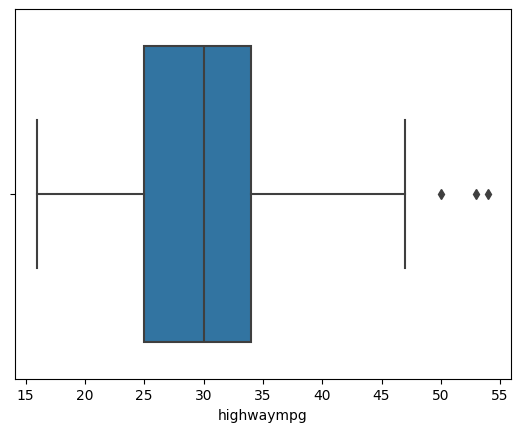

In [229]:
sns.boxplot( data = numerical, x = "highwaympg")

In [230]:
#### we have outliers in highwaympg, need to treat outliers

<Axes: xlabel='price', ylabel='Count'>

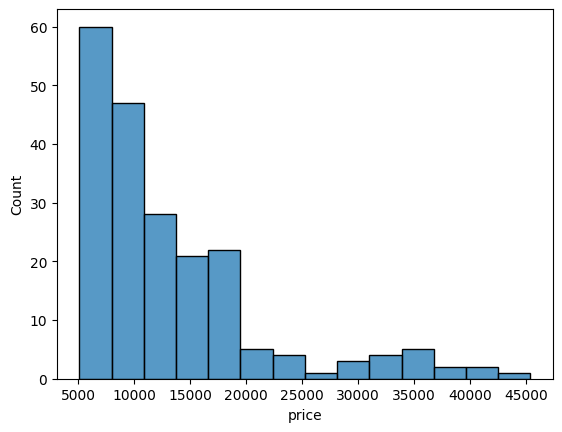

In [231]:
sns.histplot(data=numerical, x='price')

In [232]:
##### Price is Left Skewed, following long tail at the right
##### Most of the car price ranges between 5K- 20K

<Axes: xlabel='price'>

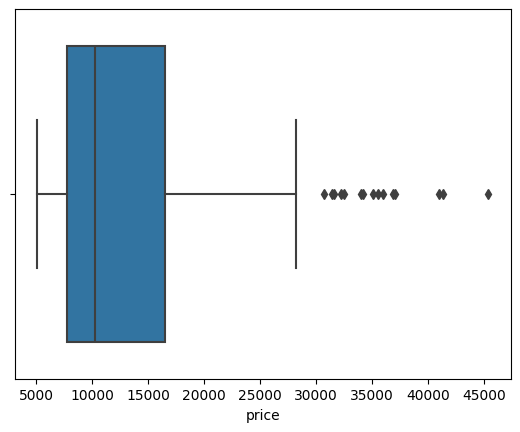

In [233]:
sns.boxplot(data=numerical, x='price')

In [234]:
### We have outliers in Price, need to treat outliers

### Categorical Analysis

In [235]:
categorical.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [236]:
categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0


In [237]:
categorical[["symboling"]].value_counts()

symboling
 0           67
 1           54
 2           32
 3           27
-1           22
-2            3
Name: count, dtype: int64

<Axes: xlabel='symboling', ylabel='Count'>

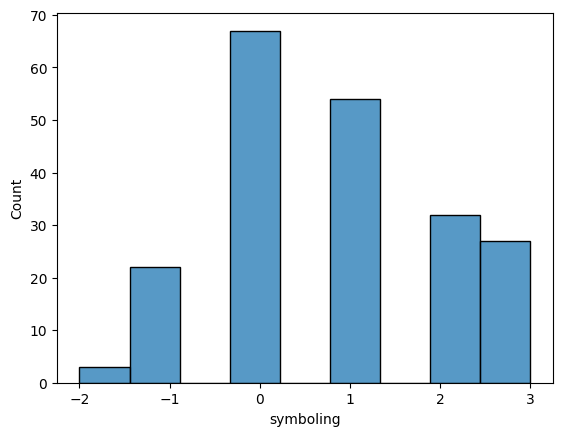

In [238]:
sns.histplot( data = categorical, x ="symboling")

In [239]:
categorical.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [240]:
categorical[['CarName']].value_counts()

CarName            
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: count, Length: 147, dtype: int64

In [241]:
categorical[["fueltype"]].value_counts()

fueltype
gas         185
diesel       20
Name: count, dtype: int64

In [242]:
fueltype = ["Gas", "Diesel"]
counts = [185, 20]

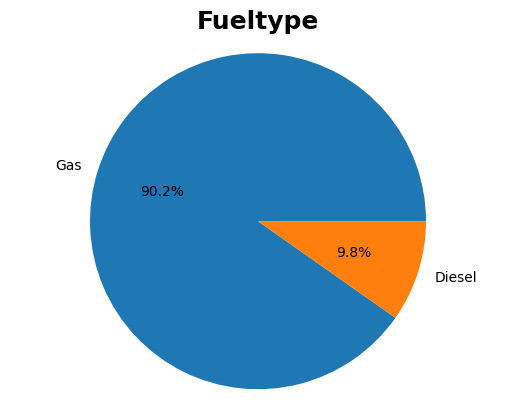

In [243]:
plt.pie(counts, labels = fueltype, autopct = "%1.1f%%")
plt.title("Fueltype", fontsize = 18, fontweight = "bold")
plt.axis("equal")
# plt.subplots_adjust(top = 1.2)
plt.show()

In [244]:
#### Most of the car useing "Gas" here

In [245]:
categorical[["aspiration"]].value_counts()

aspiration
std           168
turbo          37
Name: count, dtype: int64

In [246]:
aspiration = ["Std", "Turbo"]
counts = [168, 37]

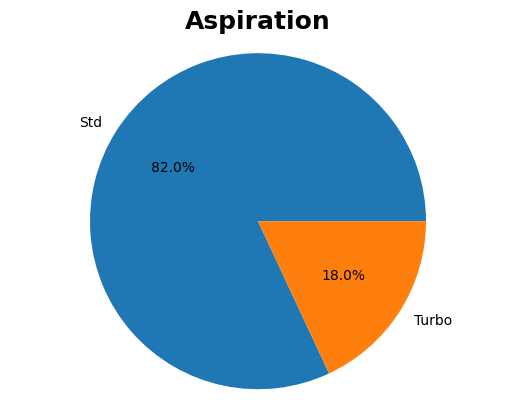

In [247]:
plt.pie(counts, labels = aspiration, autopct = "%1.1f%%")
plt.title("Aspiration", fontsize = 18, fontweight = "bold")
plt.axis("equal")
# plt.subplots_adjust(top = 1.2)
plt.show()

In [248]:
#### Mosth of the "Std" in car

In [249]:
categorical[["doornumber"]].value_counts()

doornumber
four          115
two            90
Name: count, dtype: int64

In [250]:
doornumber = ["Four", "Two"]
counts = [115, 90]

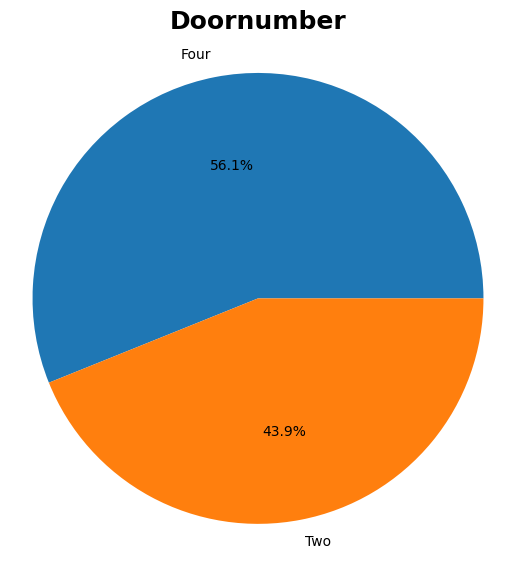

In [251]:
plt.pie(counts, labels = doornumber, autopct = "%1.1f%%")
plt.title("Doornumber", fontsize = 18, fontweight = "bold")
plt.axis("equal")
plt.subplots_adjust(top = 1.2)
plt.show()

In [252]:
categorical[["carbody"]].value_counts()

carbody    
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [253]:
carbody = ["sedan", "hatchback", "wagon", "hardtop", "convertible"]
counts = [96, 70, 25, 8, 6]

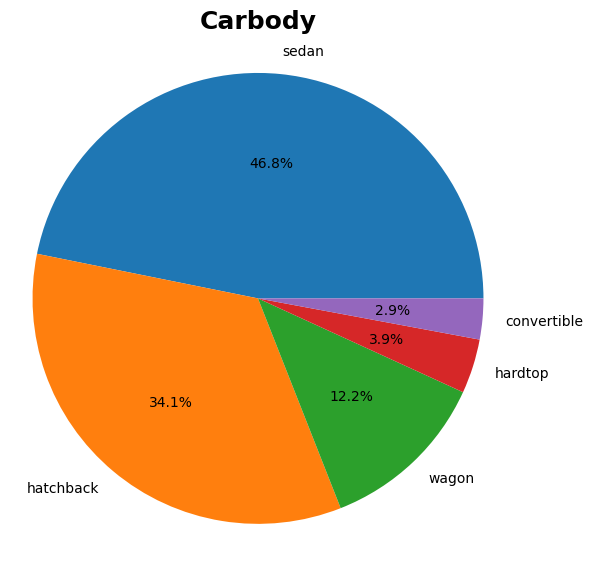

In [254]:
plt.pie(counts, labels = carbody, autopct = "%1.1f%%")
plt.title("Carbody", fontsize = 18, fontweight = "bold")
plt.axis("equal")
plt.subplots_adjust(top = 1.2)
plt.show()

In [255]:
categorical[["drivewheel"]].value_counts()

drivewheel
fwd           120
rwd            76
4wd             9
Name: count, dtype: int64

In [256]:
drivewheel = ["fwd", "rwd", "4wd"]
counts = [120, 76, 9]

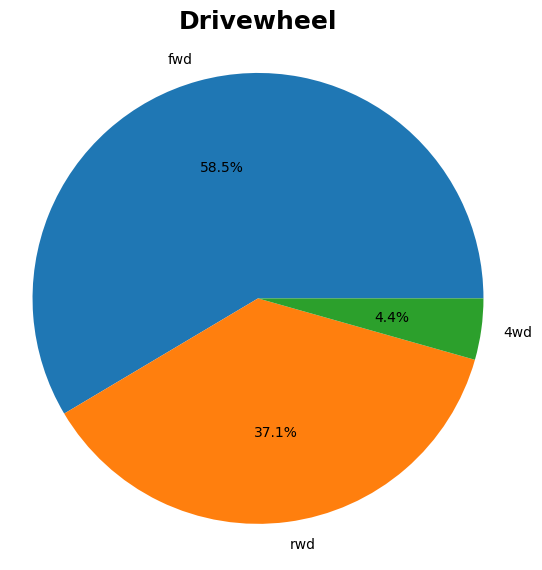

In [257]:
plt.pie(counts, labels = drivewheel, autopct = "%1.1f%%")
plt.title("Drivewheel", fontsize = 18, fontweight = "bold")
plt.axis("equal")
plt.subplots_adjust(top = 1.2)
plt.show()

In [258]:
categorical[["enginelocation"]].value_counts()

enginelocation
front             202
rear                3
Name: count, dtype: int64

In [259]:
enginelocation = ["front", "rear"]
counts = [202, 3]

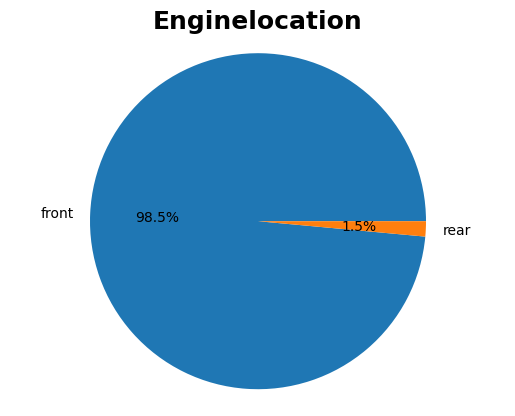

In [260]:
plt.pie(counts, labels = enginelocation, autopct = "%1.1f%%")
plt.title("Enginelocation", fontsize = 18, fontweight = "bold")
plt.axis("equal")
# plt.subplots_adjust(top = 1.2)
plt.show()

In [261]:
categorical[["enginetype"]].value_counts()

enginetype
ohc           148
ohcf           15
ohcv           13
dohc           12
l              12
rotor           4
dohcv           1
Name: count, dtype: int64

In [262]:
enginetype = ["ohc", "ohcf", "ohcv", "dohc", "l", "rotor", "dohcv"]
counts = [148, 15, 13, 12, 12, 4, 1]

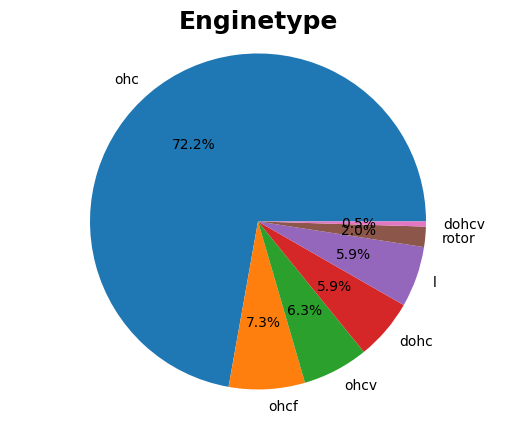

In [263]:
plt.pie(counts, labels = enginetype, autopct = "%1.1f%%")
plt.title("Enginetype", fontsize = 18, fontweight = "bold")
plt.axis("equal")
# plt.subplots_adjust(top = 1.2)
plt.show()

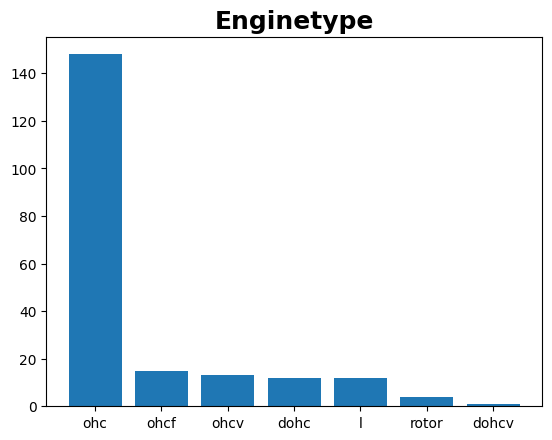

In [264]:
plt.bar( enginetype, counts)
plt.title("Enginetype", fontsize = 18, fontweight = "bold")
plt.show()

In [265]:
categorical[["cylindernumber"]].value_counts()

cylindernumber
four              159
six                24
five               11
eight               5
two                 4
three               1
twelve              1
Name: count, dtype: int64

In [266]:
cylindernumber = ["four", "six", "five", "eight", "two", "three", "twelve"]
counts = [159, 24, 11, 5, 4, 1, 1]

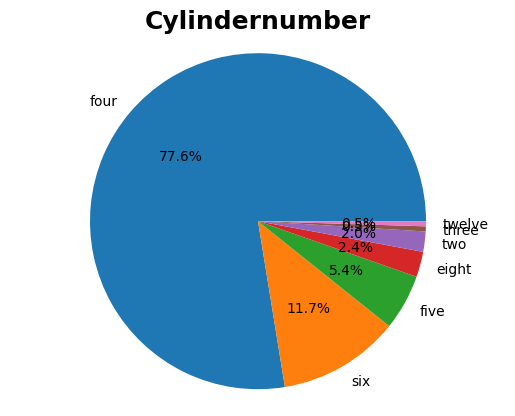

In [267]:
plt.pie(counts, labels = cylindernumber, autopct = "%1.1f%%")
plt.title("Cylindernumber", fontsize = 18, fontweight = "bold")
plt.axis("equal")
# plt.subplots_adjust(top = 1.2)
plt.show()

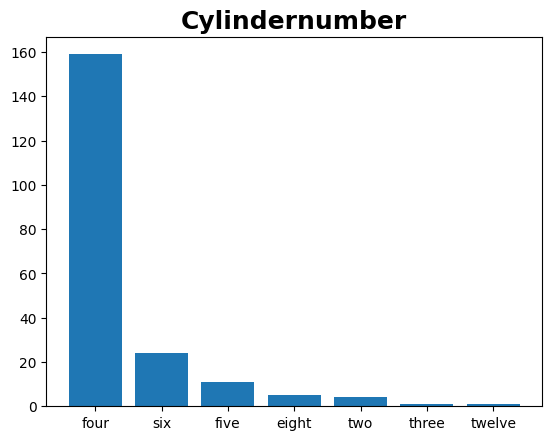

In [268]:
plt.bar( cylindernumber, counts)
plt.title("Cylindernumber", fontsize = 18, fontweight = "bold")
plt.show()

In [269]:
categorical[["fuelsystem"]].value_counts()

fuelsystem
mpfi          94
2bbl          66
idi           20
1bbl          11
spdi           9
4bbl           3
mfi            1
spfi           1
Name: count, dtype: int64

In [270]:
fuelsystem = ["mpfi", "2bbl", "idi", "1bbl", "spdi", "4bbl", "mfi", "spfi"]
counts = [94, 66, 20, 11, 9, 3, 1, 1]

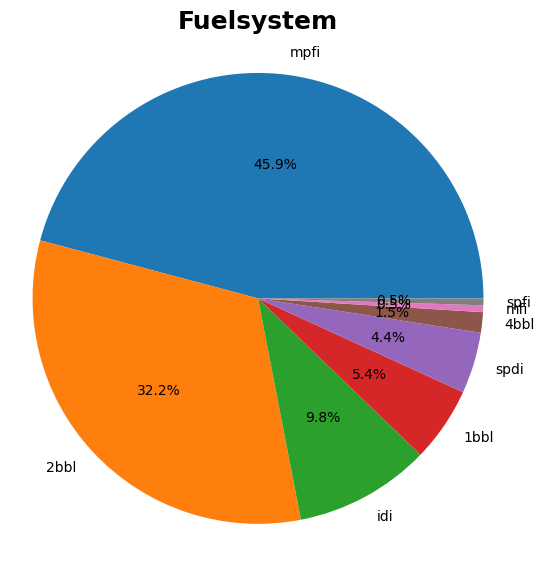

In [271]:
plt.pie(counts, labels = fuelsystem, autopct = "%1.1f%%")
plt.title("Fuelsystem", fontsize = 18, fontweight = "bold")
plt.axis("equal")
plt.subplots_adjust(top = 1.2)
plt.show()

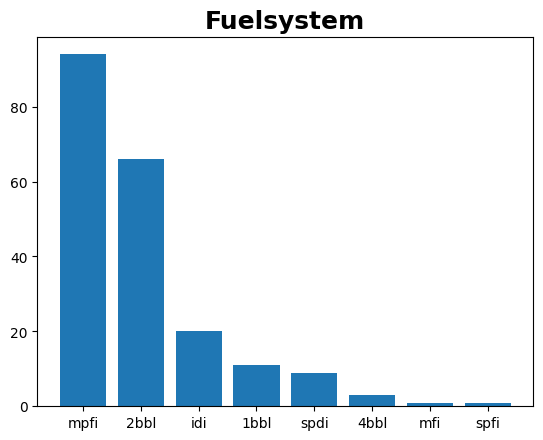

In [272]:
plt.bar( fuelsystem, counts)
plt.title("Fuelsystem", fontsize = 18, fontweight = "bold")
plt.show()

In [273]:
categorical.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

## Bivariate/Multivariate analysis
    - Line Plot
    - Scatter Plot
    - Pairplot
    - Bubble Chart
    - HeatMap

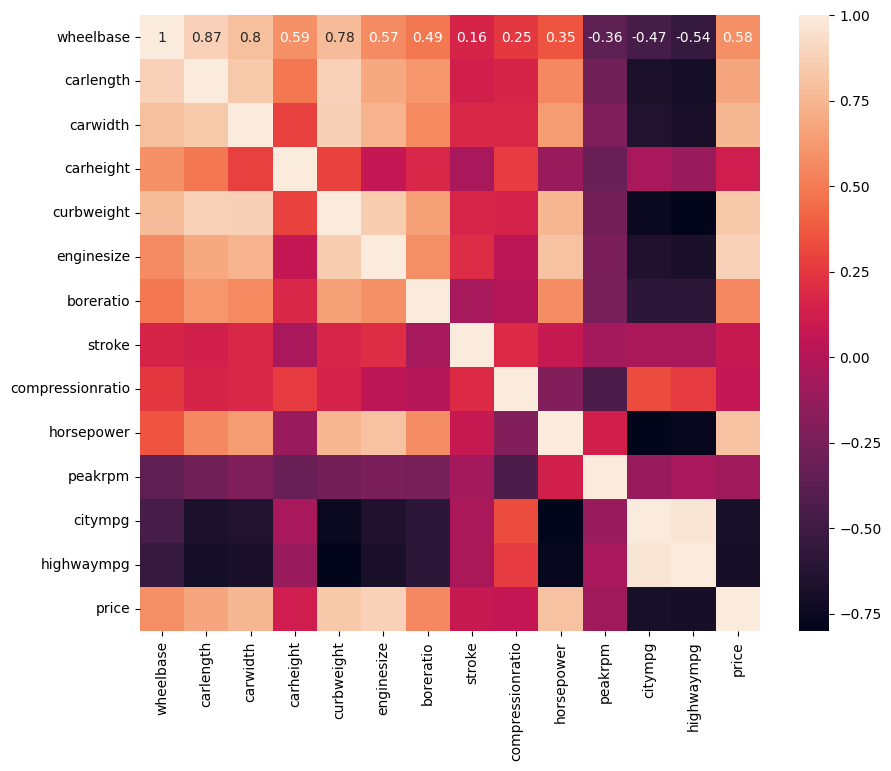

In [274]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical.corr(), annot = True, linecolor = "white", )
plt.show()

<Axes: >

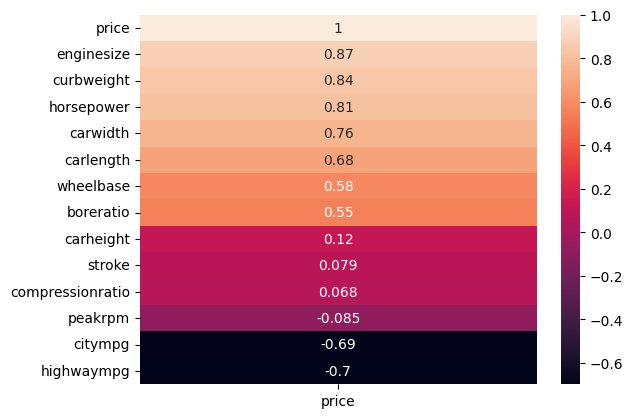

In [31]:
sns.heatmap(numerical.corr()[['price']].sort_values(by='price', ascending=False), annot=True)

In [32]:
### Top correlated features
### enginesize, curbweight, horsepower, 
### observational feature carwidth, carlength

<Axes: xlabel='enginesize', ylabel='price'>

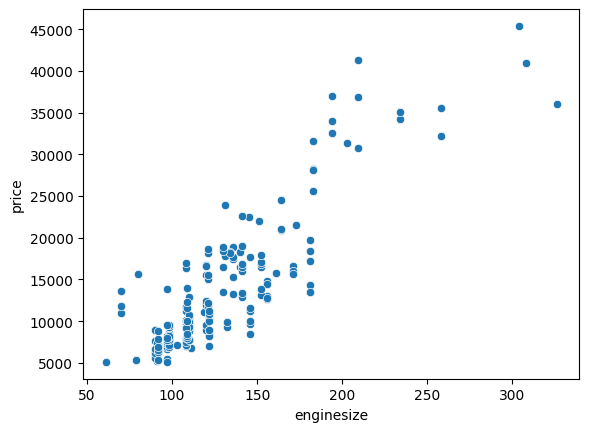

In [33]:
sns.scatterplot(data=numerical, x='enginesize', y='price')

<Axes: xlabel='curbweight', ylabel='price'>

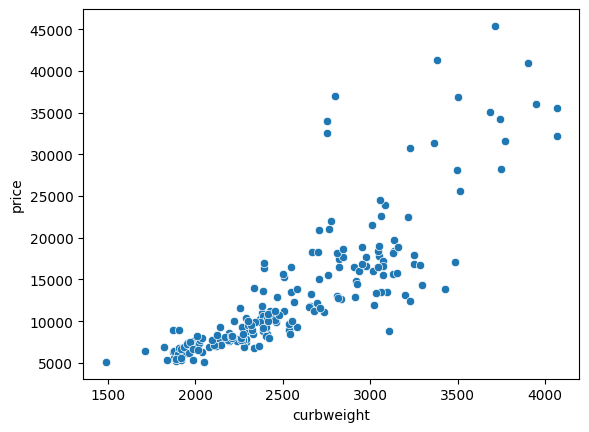

In [34]:
sns.scatterplot(data=numerical, x='curbweight', y='price')

<Axes: xlabel='horsepower', ylabel='price'>

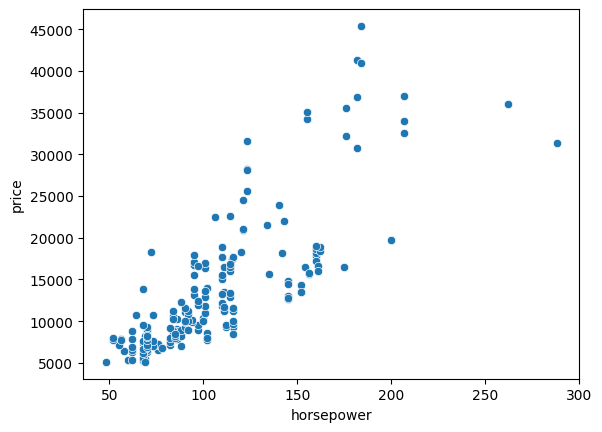

In [35]:
sns.scatterplot(data=numerical, x='horsepower', y='price')

In [36]:
####

<Axes: >

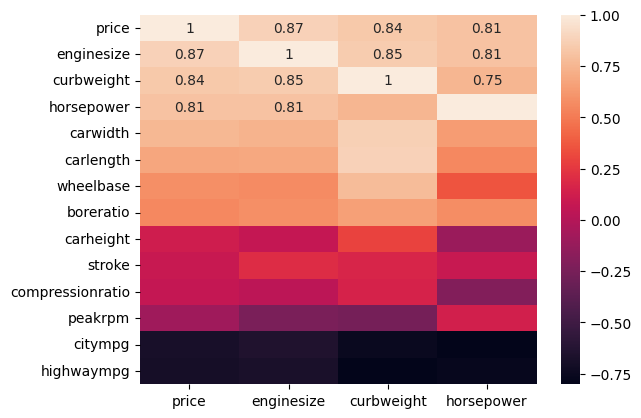

In [37]:
### checking multicolinearity
sns.heatmap(
    numerical.corr()[['price', 'enginesize', 'curbweight',
                      'horsepower']].sort_values(by='price', ascending=False),
    annot=True)

In [38]:
### there is strong correlation between (enginesize, horsepower), (enginesize, curbweight)
### We can combine enginesize and curbweight into one feature

# Numerical Analysis
    - GroupBy
    - Pivot Tables
    - Query

In [39]:
# df.groupby(by='enginetype').mean()[['price']]